Your Name and PRN:
- Name : Manasi Malge
- PRN  : 240340128013
- Date : 16-05-2024

# Image Processing with Neural Network
## Assignment A01

## Implement of MP Neuron
### DataSet - As instructed.

## Import Statements

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import os

## Setup Global Parameters

In [49]:
RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

In [50]:
NOISE = 0.2
EPOCHS = 200
ALPHA = 0.1
N_SAMPLES = 1000

In [51]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }
plt.rcParams.update(params)

In [52]:
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [53]:
os.chdir(r'D:\March 2024\DNN\Assignments\Assignment 1')

In [54]:
data_df = pd.read_csv('breast_cancer_mod.csv')
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


## Visualisaton

In [55]:
data_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [56]:
data_df.describe() # Generate descriptive statistic

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.00000,569.000000
mean,0.820738,0.880492,0.827768,0.954306,0.811951,0.910369,0.917399,0.899824,0.831283,0.927944,...,0.790861,0.868190,0.966608,0.762742,0.942004,0.926186,0.678383,0.956063,0.97891,0.627417
std,0.383909,0.324671,0.377914,0.209005,0.391095,0.285904,0.275520,0.300498,0.374831,0.258809,...,0.407052,0.338582,0.179816,0.425776,0.233942,0.261698,0.467508,0.205135,0.14381,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


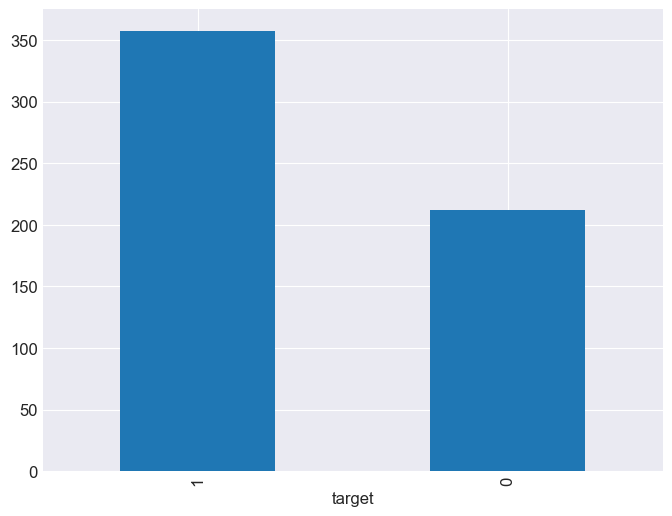

In [57]:
fig, ax = plt.subplots(figsize=(8,6)) # Instantiate

data_df['target'].value_counts().plot(ax=ax, kind='bar');

## Train Test Split

In [58]:
feature_df = data_df.drop('target',axis=1)
labels = data_df['target']
X_train, X_test, y_train, y_test = train_test_split(feature_df, 
                                                    labels, test_size=0.2, 
                                                    stratify=labels, 
                                                    random_state=24)

## Train DataSet

In [59]:
#downncasting to avoid errors
X_train['total'] = X_train.astype(np.int16).sum(axis=1)
# We use astype because it can give error for sum
X_train['target'] = y_train
X_train.sort_values('total', inplace= True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0


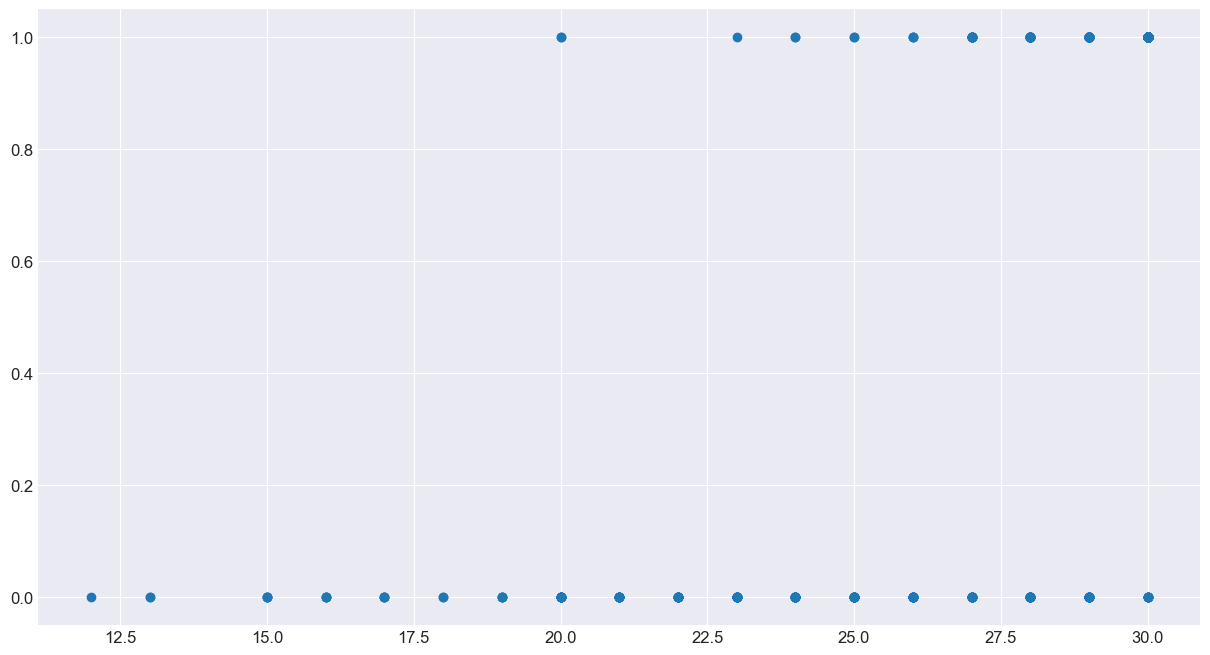

In [60]:
plt.scatter(X_train['total'], X_train['target']);

target     0      1
total              
12       1.0    NaN
13       2.0    NaN
15       4.0    NaN
16       4.0    NaN
17       4.0    NaN
18       2.0    NaN
19       4.0    NaN
20      10.0    2.0
21       9.0    NaN
22      11.0    NaN
23      17.0    1.0
24      17.0    2.0
25      15.0    2.0
26      12.0    3.0
27      15.0   16.0
28      21.0   32.0
29      15.0   50.0
30       7.0  177.0


(27, 3)

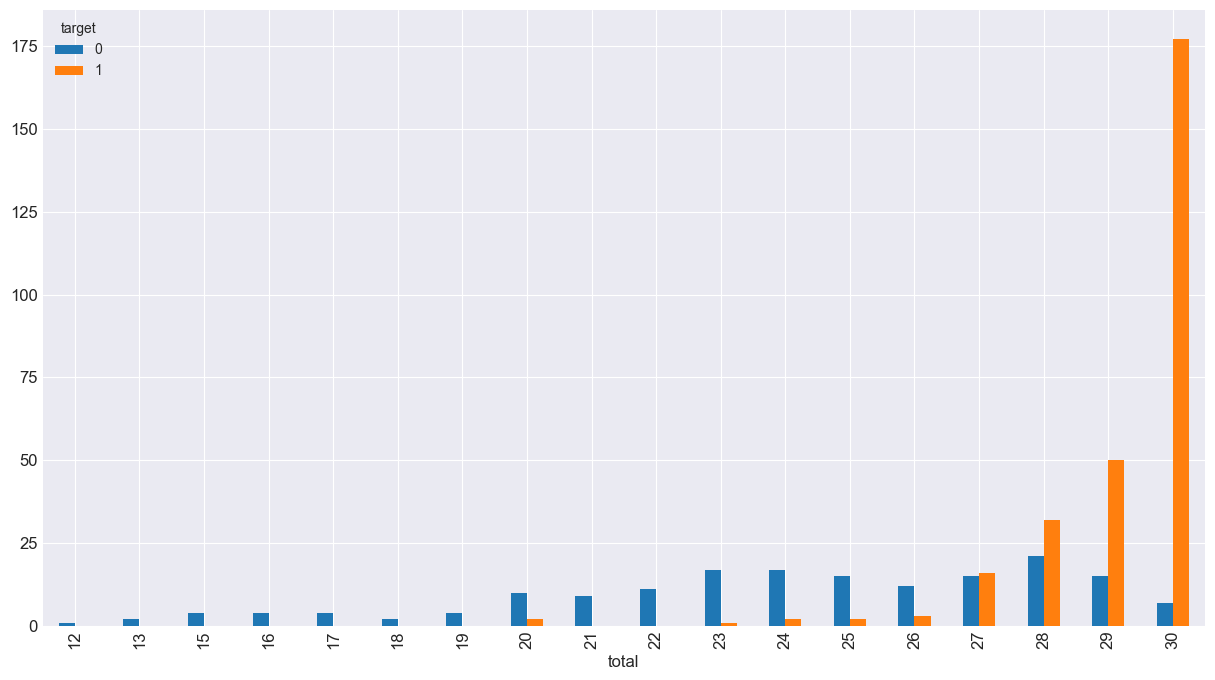

In [61]:
tmp_df=X_train.groupby(['total','target']).agg({'target':'count'})
tmp_df.columns=['count']
tmp_df.reset_index(inplace=True)

print(tmp_df.pivot(index='total',columns='target',values='count'))

tmp_df.pivot(index='total',columns='target',values='count').plot(kind='bar')
tmp_df.shape

In [62]:
accuracy={}
for b in range(X_train.shape[1]):
  X_train['pred']=X_train['total']>=b
  accuracy[b]=accuracy_score(X_train['target'],X_train['pred'])

In [63]:
accuracy

{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6329670329670329,
 15: 0.6329670329670329,
 16: 0.6417582417582418,
 17: 0.6505494505494506,
 18: 0.6593406593406593,
 19: 0.6637362637362637,
 20: 0.6725274725274726,
 21: 0.6901098901098901,
 22: 0.7098901098901099,
 23: 0.734065934065934,
 24: 0.7692307692307693,
 25: 0.8021978021978022,
 26: 0.8307692307692308,
 27: 0.8505494505494505,
 28: 0.8483516483516483,
 29: 0.8241758241758241,
 30: 0.7472527472527473,
 31: 0.37362637362637363}

In [64]:
b_best = max(accuracy, key= accuracy.get)
b_best

27

In [65]:
print ('Accuracy of training is:',accuracy[27])

Accuracy of training is: 0.8505494505494505


## Test DataSet

In [66]:
#downncasting to avoid errors
X_test['total'] = X_test.astype(np.int16).sum(axis=1)
# We use astype because it can give error for sum
X_test['target'] = y_test
X_test.sort_values('total', inplace= True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
12,0,1,0,0,0,1,0,0,1,1,...,0,0,1,1,1,0,1,1,16,0
18,0,0,0,1,1,0,0,0,0,1,...,0,1,0,1,1,0,1,1,18,0
35,1,1,1,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,20,0


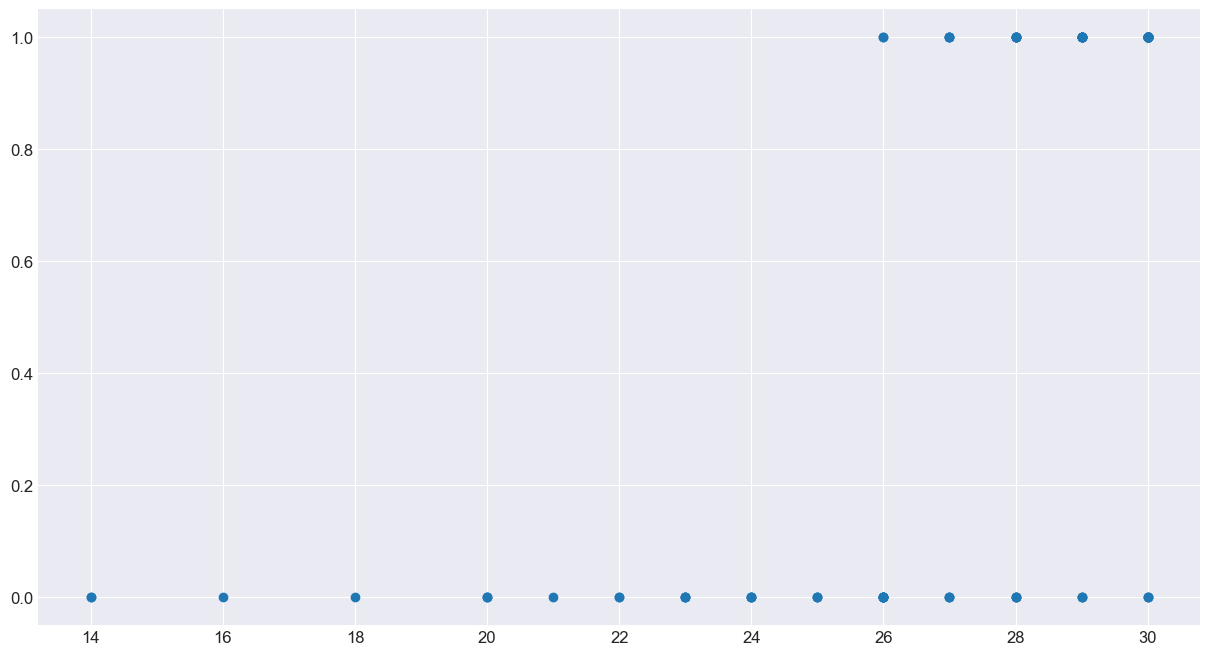

In [67]:
plt.scatter(X_test['total'], X_test['target']);

target    0     1
total            
14      2.0   NaN
16      1.0   NaN
18      1.0   NaN
20      3.0   NaN
21      1.0   NaN
22      2.0   NaN
23      4.0   NaN
24      4.0   NaN
25      3.0   NaN
26      8.0   2.0
27      3.0   4.0
28      4.0   7.0
29      3.0  10.0
30      3.0  49.0


(19, 3)

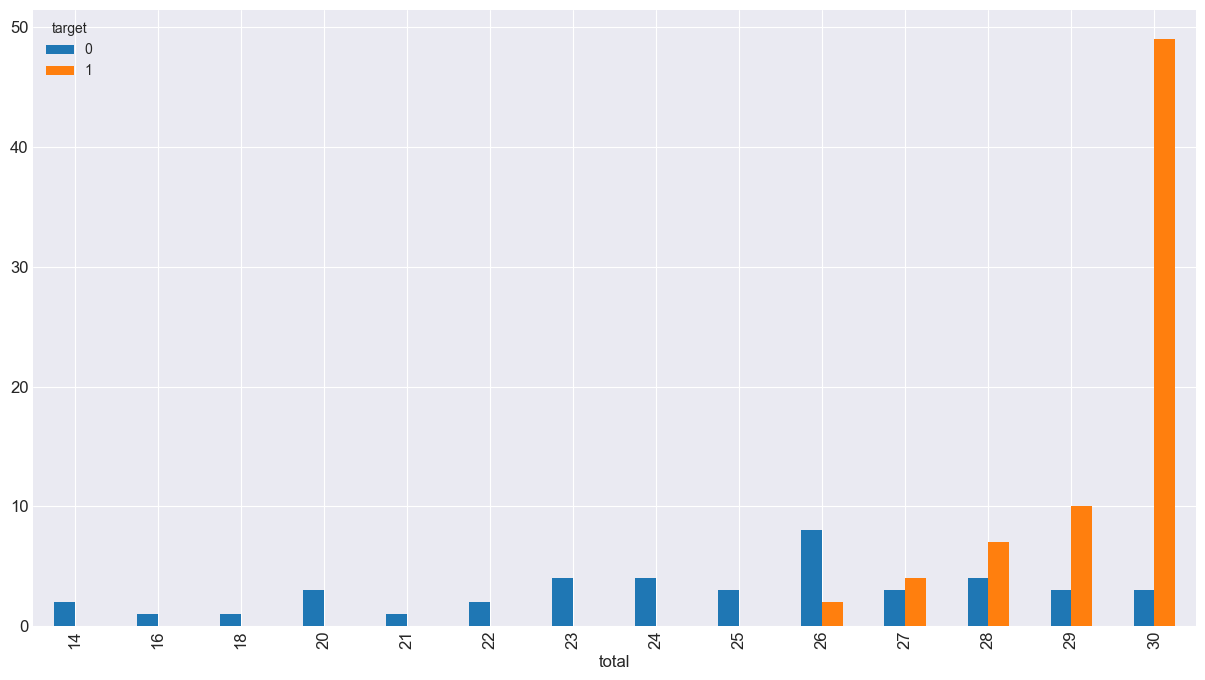

In [76]:
tmp_df = X_test.groupby(['total', 'target']).agg({'target': 'count'})
tmp_df.columns = ['count']
tmp_df.reset_index(inplace=True)

print(tmp_df.pivot(index='total',columns='target',values='count'))

tmp_df.pivot(index='total',columns='target',values='count').plot(kind='bar')
tmp_df.shape

In [72]:
accuracy1 = {}

for b in range(X_test.shape[1]):
    X_test['pred'] = X_test['total'] >= b
    accuracy1[b] = accuracy_score(X_test['target'], X_test['pred'])

In [73]:
accuracy1

{0: 0.631578947368421,
 1: 0.631578947368421,
 2: 0.631578947368421,
 3: 0.631578947368421,
 4: 0.631578947368421,
 5: 0.631578947368421,
 6: 0.631578947368421,
 7: 0.631578947368421,
 8: 0.631578947368421,
 9: 0.631578947368421,
 10: 0.631578947368421,
 11: 0.631578947368421,
 12: 0.631578947368421,
 13: 0.631578947368421,
 14: 0.631578947368421,
 15: 0.6491228070175439,
 16: 0.6491228070175439,
 17: 0.6578947368421053,
 18: 0.6578947368421053,
 19: 0.6666666666666666,
 20: 0.6666666666666666,
 21: 0.6929824561403509,
 22: 0.7017543859649122,
 23: 0.7192982456140351,
 24: 0.7543859649122807,
 25: 0.7894736842105263,
 26: 0.8157894736842105,
 27: 0.868421052631579,
 28: 0.8596491228070176,
 29: 0.8333333333333334,
 30: 0.7719298245614035,
 31: 0.3684210526315789,
 32: 0.3684210526315789}

In [74]:
b_best1 = max(accuracy1, key= accuracy1.get)
b_best1

27

In [75]:
print ('Accuracy of testing is:',accuracy1[27])

Accuracy of testing is: 0.868421052631579
